## Evaluation Harness for Visualizaiton Generation Pipelines 

The goal is to implement a harness that can take a list of datasets and compute a set of evaluation metrics 

- Visualization error rate 
- Self Evaluated Visualization Quality 



In [1]:
import pandas as pd 
import numpy as np 
import os 
from tqdm import tqdm
from lida import Manager, TextGenerationConfig , llm  
from dataclasses import asdict

In [2]:
def get_data():
    exclude = ["annual-precip.json"]
    datasets_list = os.listdir('data/vega')
    datasets_list = [dataset for dataset in datasets_list if dataset not in exclude]
    print(len(datasets_list), "datasets found")
    return datasets_list
datasets_list = get_data()    

68 datasets found


In [3]:
text_generator = llm("openai")

text_gen_configs= [
    TextGenerationConfig(n=1, temperature=0.2, model="gpt-3.5-turbo-0301", use_cache=True),
    TextGenerationConfig(n=1, temperature=0.2, model="gpt-4-0314", use_cache=True),
]

lida = Manager(text_gen=text_generator)

visualizations = []
for textgen_config in text_gen_configs:
    for dataset_item in tqdm(datasets_list[0:10]):
        print("Processing dataset: ", dataset_item )
        dataset_item = os.path.join('data/vega', dataset_item)
        summary_method = "default"
        summary = lida.summarize(dataset_item, summary_method=summary_method, textgen_config=textgen_config)  
        goals = lida.goals(summary, n=5, textgen_config=textgen_config) 
    
        library = "seaborn"
        for goal in tqdm(goals) :
            charts = lida.visualize(summary=summary, goal=goal, textgen_config=textgen_config, library=library, return_error=True)
            chart = asdict(charts[0]) 
            chart.update({"goal": asdict(goal), "library": library, "dataset": dataset_item, "summary_method": summary_method, "model": textgen_config.model}) 
            visualizations.append(chart)
 

  0%|          | 0/10 [00:00<?, ?it/s]

Processing dataset:  co2-concentration.csv


<string>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 10%|█         | 1/10 [00:01<00:11,  1.31s/it]

Processing dataset:  wheat.json


 20%|██        | 2/10 [00:02<00:08,  1.08s/it]

Processing dataset:  la-riots.csv


 30%|███       | 3/10 [00:02<00:06,  1.13it/s]

Processing dataset:  flights-3m.csv


<string>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

 40%|████      | 4/10 [00:03<00:05,  1.05it/s]

Processing dataset:  birdstrikes.csv


 50%|█████     | 5/10 [00:05<00:05,  1.11s/it]

Processing dataset:  income.json


 60%|██████    | 6/10 [00:05<00:03,  1.17it/s]

Processing dataset:  stocks.csv


 70%|███████   | 7/10 [00:08<00:04,  1.46s/it]

Processing dataset:  movies.json


 80%|████████  | 8/10 [00:09<00:02,  1.35s/it]

Processing dataset:  penguins.json


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 90%|█████████ | 9/10 [00:10<00:01,  1.29s/it]

Processing dataset:  flare-dependencies.json


  0%|          | 0/10 [00:00<?, ?it/s]

Processing dataset:  co2-concentration.csv


 10%|█         | 1/10 [00:00<00:08,  1.04it/s]

Processing dataset:  wheat.json


 20%|██        | 2/10 [00:01<00:05,  1.34it/s]

Processing dataset:  la-riots.csv


 30%|███       | 3/10 [00:10<00:30,  4.40s/it]

Processing dataset:  flights-3m.csv


 40%|████      | 4/10 [00:13<00:23,  3.87s/it]

Processing dataset:  birdstrikes.csv


 50%|█████     | 5/10 [00:14<00:14,  2.86s/it]

Processing dataset:  income.json


<string>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

/home/victordibia/miniconda3/envs/coral/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
 60%|██████    | 6/10 [00:19<00:15,  3.75s/it]

Processing dataset:  stocks.csv


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/victordibia/miniconda3/envs/coral/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
 70%|███████   | 7/10 [00:21<00:08,  2.98s/it]

Processing dataset:  movies.json


 80%|████████  | 8/10 [00:22<00:04,  2.25s/it]

Processing dataset:  penguins.json


 90%|█████████ | 9/10 [00:22<00:01,  1.73s/it]

Processing dataset:  flare-dependencies.json


100%|██████████| 10/10 [00:26<00:00,  2.65s/it]


In [4]:
vdf = pd.DataFrame(visualizations) 
print(vdf.shape)
vdf.head()

(100, 10)


,spec,status,raster,code,library,error,goal,dataset,summary_method,model
0,None,True,iVBORw0KGgoAAAANSUhEUgAABLAAAAJYCAYAAABy5h8aAA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the trend in CO2 concent...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
1,None,True,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the relationship between...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
2,None,True,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the distribution of CO2 ...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
3,None,True,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAA...,import seaborn as sns\nimport pandas as pd\nim...,seaborn,None,{'question': 'What is the average CO2 concentr...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301
4,None,False,None,import seaborn as sns\nimport pandas as pd\nim...,seaborn,"{'message': '""['latitude'] not in index""', 'tr...",{'question': 'What is the relationship between...,data/vega/co2-concentration.csv,default,gpt-3.5-turbo-0301


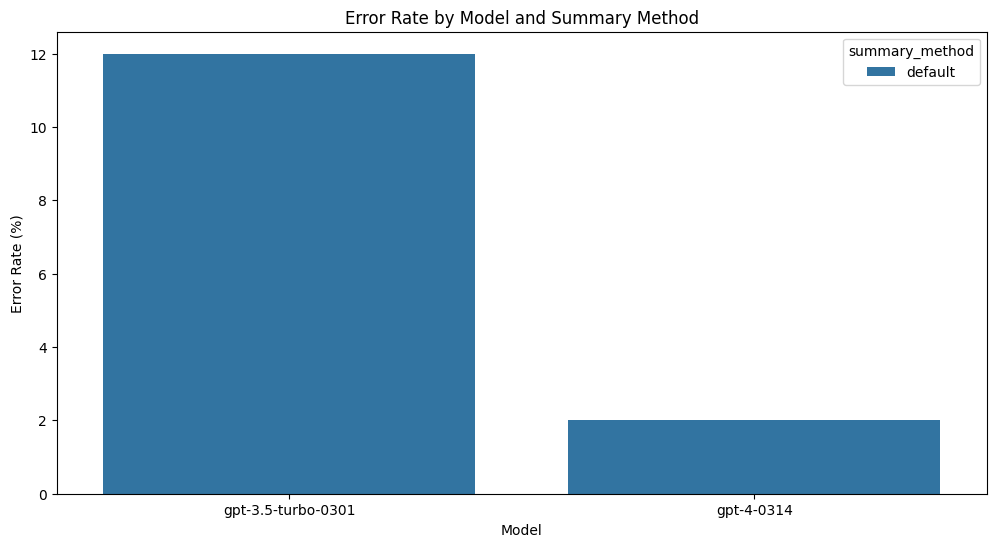

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_error_rate(data: pd.DataFrame):
    # Calculate error rate
    data['error_rate'] = data['status'].apply(lambda x: 0 if x else 1)
    
    # Group by model and summary_method, then calculate the mean error_rate (percentage)
    error_rate_data = data.groupby(['model', 'summary_method'])['error_rate'].mean().reset_index()
    error_rate_data['error_rate'] = error_rate_data['error_rate'] * 100
    
    # Create a stacked bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x='model', y='error_rate', hue='summary_method', data=error_rate_data, errorbar=None)
    
    num_viz = data.shape[0]
    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Error Rate (%)')
    plt.title(f'Error Rate by Model and Summary Method | n={str(num_viz)}')
    
    return plt

# Assuming the data is in a pandas DataFrame called 'df'
chart = plot_error_rate(vdf)
chart.show()

## Metrics 

- Visualization Error Rate VER
- Self Evaluation Visualization Quality SEVQ

## Methods 

- Generate visualization 
- Visualize error rates 
- Compute SEVQ 